In [1]:
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# ACLARACION IMPORTANTE
# Si bien estamos acostumbrados a usar mapas de calor
#   para matrices de correlacion, estos mapas son utiles
#   para visualizar relaciones entre variables categoricas independientes
#   cuya relacion posee valores propios

# Cargar el dataset 'flights' de Seaborn
flights = sns.load_dataset('flights')
print(flights)



,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


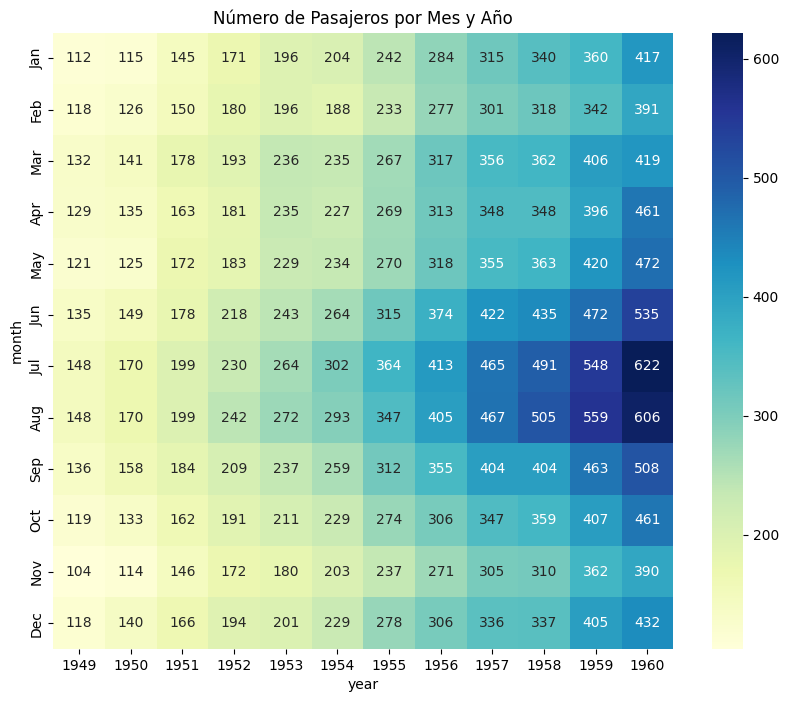

In [ ]:
# Crear una tabla pivote con los datos de vuelos

# El siguiente dataframe transformado muestra la cantidad de pasajeros
# en relacion al año y mes
flights_pivot = flights.pivot(index='month', columns='year', values='passengers')

# Crear el heatmap
# Este heatmap aumenta de intensidad a medida que
# mas pasajeros se corresponden a un mes y año
plt.figure(figsize=(10, 8))
sns.heatmap(flights_pivot, annot=True, fmt="d", cmap="YlGnBu")

# Añadir título
plt.title('Número de Pasajeros por Mes y Año')

# Mostrar el gráfico
plt.show()

In [5]:
flights_pivot

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


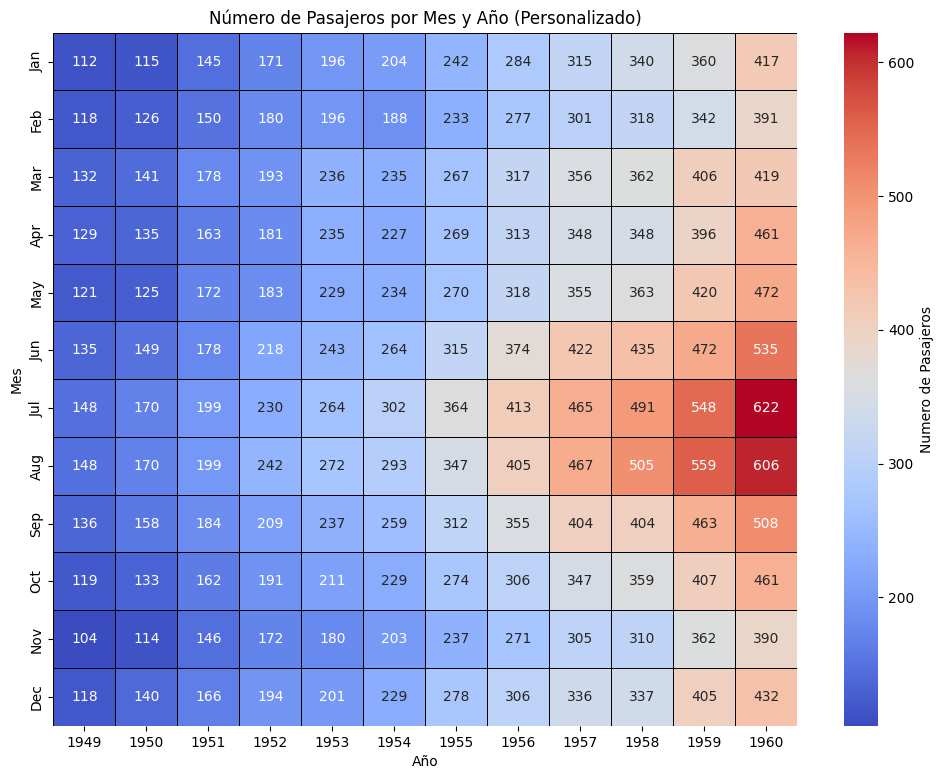

In [39]:
# Crear un heatmap avanzado con personalización adicional
plt.figure(figsize=(12, 9))

sns.heatmap(flights_pivot, annot=True, fmt="d", cmap='coolwarm', linewidths=0.5,
            linecolor='black', cbar_kws={"label": "Numero de Pasajeros"})
# Añadir título y etiquetas
plt.title('Número de Pasajeros por Mes y Año (Personalizado)')
plt.xlabel('Año')
plt.ylabel('Mes')

# Mostrar el gráfico
plt.show()

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [17]:
# Cargar el dataset 'iris' de Seaborn
iris = sns.load_dataset('iris')


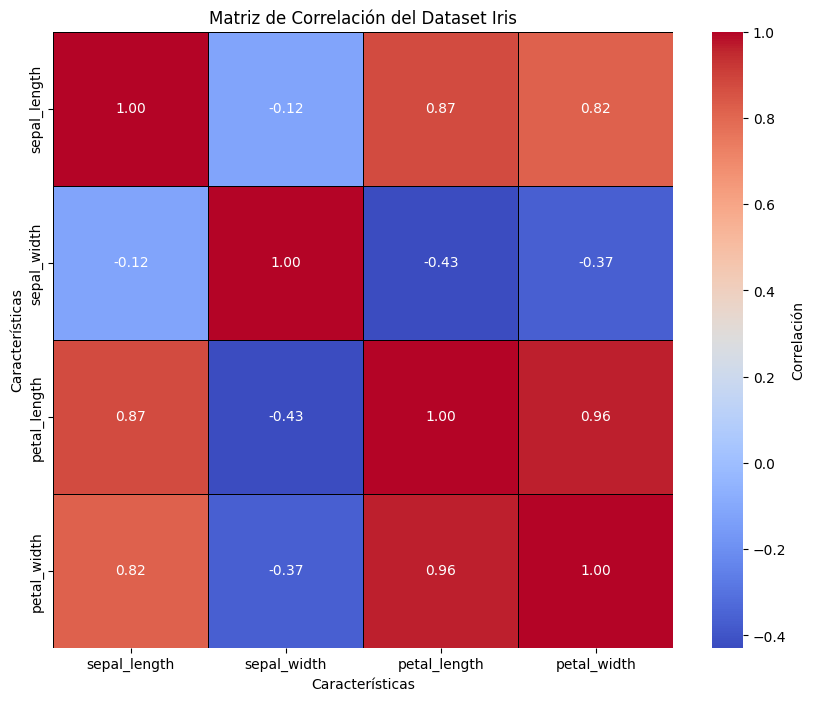

In [ ]:
# Seleccionar solo las columnas numéricas
numeric_columns = iris.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
# Este es uno de los usos mas comunes de los heatmaps
correlation_matrix = numeric_columns.corr()

# Crear el heatmap avanzado con la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f",
            cmap="coolwarm", linewidths=.5, linecolor='black',
            cbar_kws={'label': 'Correlación'})

# Añadir título y etiquetas
plt.title('Matriz de Correlación del Dataset Iris')
plt.xlabel('Características')
plt.ylabel('Características')

# Mostrar el gráfico
plt.show()

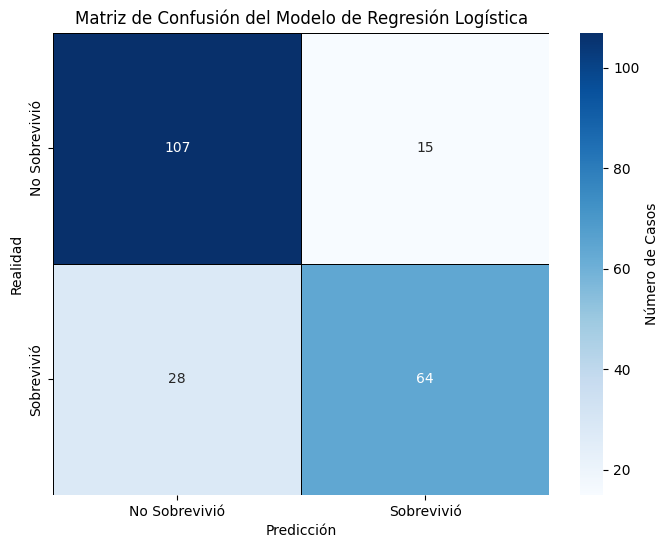

In [ ]:
#El siguiente ejemplo es un caso avanzado
# que se utiliza mucho en ciencia de datos

#Tambien es conocido como matriz de confusion

# En el siguiente caso se entrena un modelo predictivo

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Cargar el dataset 'titanic' de Seaborn
titanic = sns.load_dataset('titanic')

# Preprocesar el dataset
titanic = titanic.dropna(subset=['age', 'sex', 'embarked'])

# Convertir variables categóricas a numéricas
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Definir las características y la variable objetivo
X = titanic[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]
y = titanic['survived']

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar un modelo de regresión logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Crear el heatmap avanzado con la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            linewidths=.5, linecolor='black', cbar_kws={'label': 'Número de Casos'},
            xticklabels=['No Sobrevivió', 'Sobrevivió'], yticklabels=['No Sobrevivió', 'Sobrevivió'])

# Añadir título y etiquetas
plt.title('Matriz de Confusión del Modelo de Regresión Logística')
plt.xlabel('Predicción')
plt.ylabel('Realidad')

# Mostrar el gráfico
plt.show()

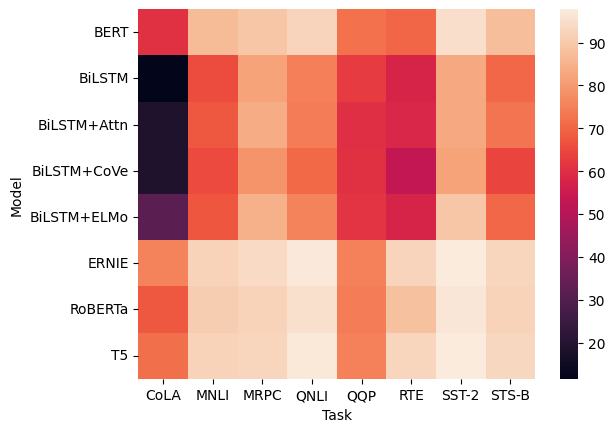

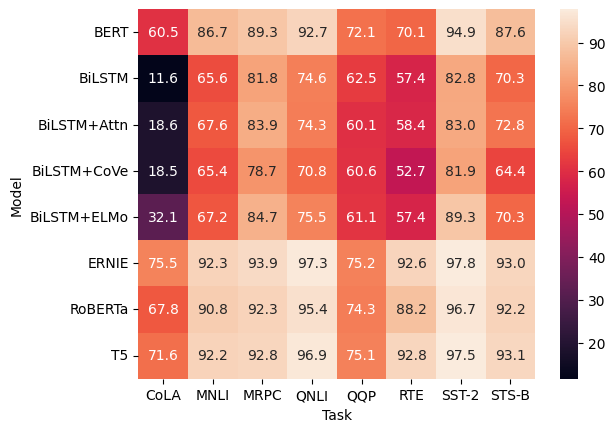

In [ ]:
# Una forma conveniente de cargar datos es
# cargar los datos y transformarlos en la misma carga

# La funcion pivot devuelve un dataframe con
#   la columna Model como indice
#   los valores de la columna Task como columnas
#   los valores de Score como valores internos o valores de correlacion
# estos ultimos valores son los que determinaran la intensidad del mapa de calor
glue = sns.load_dataset('glue').pivot(index='Model', columns='Task', values='Score')
sns.heatmap(glue)
plt.show()

#Tambien se puede personalizar el nivel de detalle de los datos
# anott= se utiliza para que se visualizen los valores de las casillas internas
# fmt= es el dato a representar, siendo ".1f" para 1 decimal, o "d" para enteros
sns.heatmap(data=glue, annot=True, fmt=".1f")
plt.show()


<Axes: xlabel='Task', ylabel='Model'>

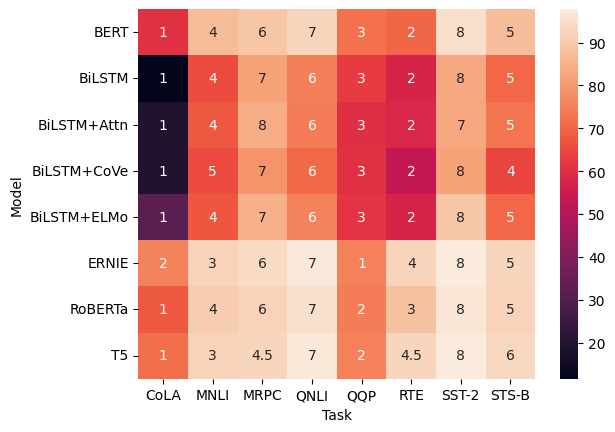

In [14]:
#Existen otro tipo de anotaciones
# Por ejemplo la siguiente que muestra el nivel de correlacion
# Entre mas alto mas claro el color

sns.heatmap(glue, annot=glue.rank(axis="columns"))

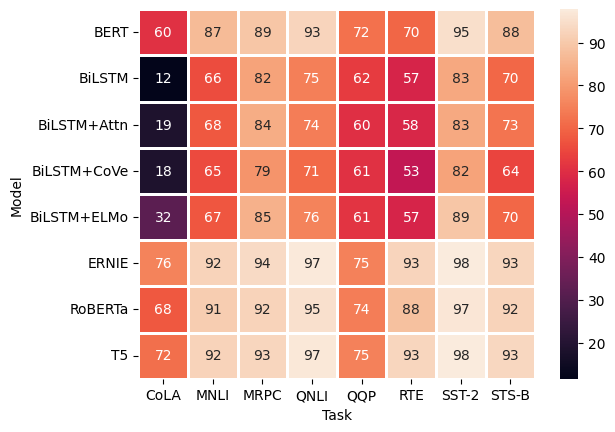

<Axes: xlabel='Task', ylabel='Model'>

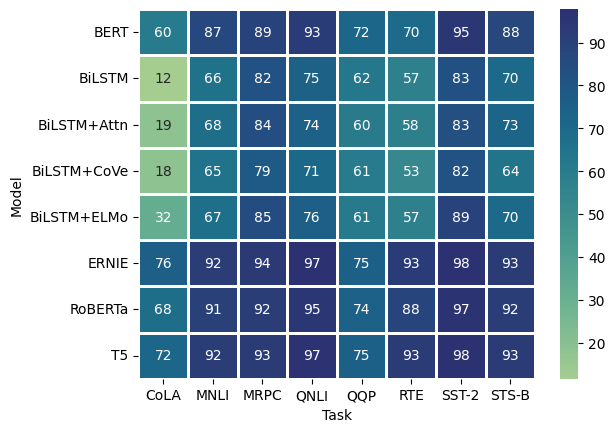

In [ ]:
#Otras personalizaciones son sobre las lineas divisorias y los colores

sns.heatmap(data=glue, annot=True, linecolor= 'white', linewidth=1)
plt.show()

#Tambien se pueden cambiar las escalas de colores
sns.heatmap(data=glue, annot=True, linecolor= 'white', linewidth=1, cmap='crest')
plt.show()

<Axes: xlabel='Task', ylabel='Model'>

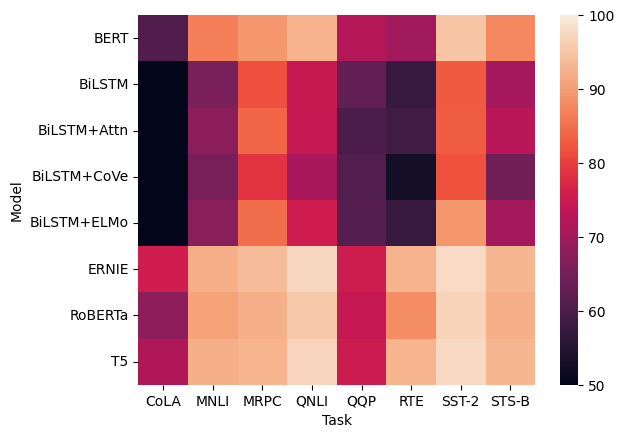

In [21]:
# Por defecto la barra de color no muestra los valores minimos y maximos
#   pero eso se puede agregar

sns.heatmap(data=glue, vmin=50, vmax=100)

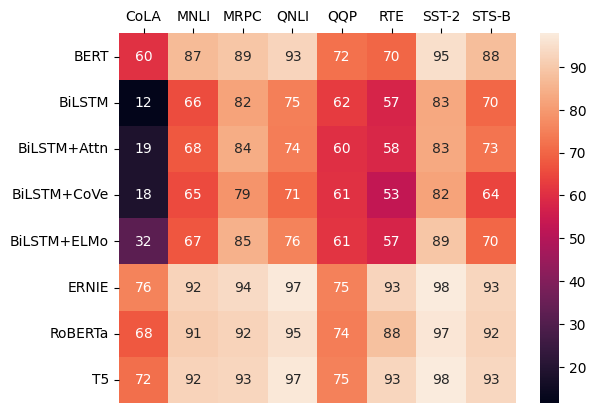

In [25]:
# Como personalizacion avanzada se pueden cambiar
#   las etiquetas y la posicion de los ejes
ax = sns.heatmap(data=glue, annot=True)
# en la siguiente linea sacamos los titulos de los ejes
ax.set(xlabel="", ylabel="")
#En esta linea invertimos la posicion de los valores de las columnas
#   colocandose de esta forma en la parte superior
ax.xaxis.tick_top()
plt.show()